In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

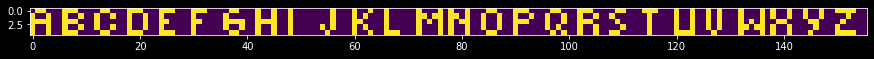

In [2]:
img = Image.open("font_5x5_a.png")

img_np = np.array(img)
# img to grayscale
img_np = np.dot(img_np[...,:3], [0.299, 0.587, 0.114])
plt.figure(figsize=(15,3))
plt.imshow(img_np)

W = 6
H = 5
row_size = 4

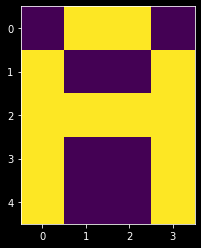

In [3]:
img_chars = img_np.T.reshape((-1,W,H))
img_chars = np.where(img_chars > 0, 1, 0)
plt.imshow(img_chars[0, :row_size].T)

In [4]:
hex_bytes = []
for i in range(0, img_chars.shape[0], 2):
	for j in range(H):
		byte_str = ""
		byte_str += "".join([str(c) for c in img_chars[i+0, :row_size].T[j]])
		byte_str += "".join([str(c) for c in img_chars[i+1, :row_size].T[j]])
		hex_bytes.append(hex(int(byte_str, 2)))

",".join(hex_bytes)

'0x6e,0x99,0xfe,0x99,0x9e,0x6e,0x99,0x89,0x99,0x6e,0xee,0x88,0xcc,0x88,0xe8,0x69,0x89,0xff,0x99,0x69,0x82,0x82,0x82,0x8a,0x84,0x98,0xa8,0xc8,0xa8,0x9e,0x89,0xdd,0xab,0x89,0x89,0x6e,0x99,0x9e,0x98,0x68,0x6e,0x99,0x9e,0xa9,0x59,0x6e,0x84,0x44,0x24,0xc4,0x9a,0x9a,0x9a,0x9a,0xf4,0x89,0x89,0xa6,0xd9,0x89,0x9f,0x92,0x64,0x28,0x4f'

In [13]:
img

'A'

In [43]:
widths = []
for i in range(img_chars.shape[0]):
	column_full = img_chars[i].T.any(axis=0)
	width = 2
	for j in range(H):
		if not column_full[j]:
			width = j
			break
	widths.append(width)
	print(f"[{i:2d}] {chr(ord('A')+i)}: {width}")

padding = (4 - len(widths) % 4) * [1]
widths += padding

[ 0] A: 4
[ 1] B: 4
[ 2] C: 4
[ 3] D: 4
[ 4] E: 3
[ 5] F: 3
[ 6] G: 4
[ 7] H: 4
[ 8] I: 1
[ 9] J: 3
[10] K: 4
[11] L: 3
[12] M: 2
[13] N: 4
[14] O: 4
[15] P: 4
[16] Q: 4
[17] R: 4
[18] S: 3
[19] T: 3
[20] U: 4
[21] V: 3
[22] W: 2
[23] X: 4
[24] Y: 4
[25] Z: 4


In [47]:
byte_str = [f"{widths[i]-1:02b}{widths[i+1]-1:02b}{widths[i+2]-1:02b}{widths[i+3]-1:02b}" for i in range(0, len(widths)-1, 4)]
hex_bytes = [f"0x{int(byte_str[i], 2):02x}" for i in range(len(byte_str))]

",".join(hex_bytes)

'0xff,0xaf,0x2e,0x7f,0xfa,0xe7,0xf0'